In [ ]:
'''
神经网络是一个模仿人类大脑，激发学习过程的框架，从数据中识别隐藏的模式。
神经网络可以做分类、聚类、生成以及其他相关任务：由多层独立的神经元元组成，输入层、输出层及其之间的隐藏层
深度神经网络可以看做是由多个隐藏层组成的神经网络。
'''

The goal of learning is reached


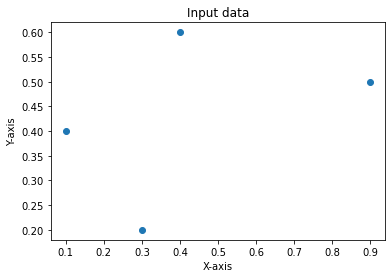

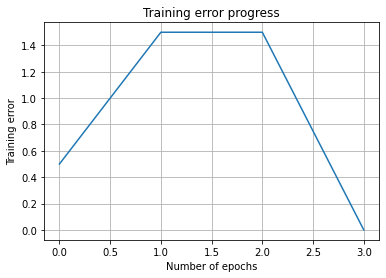

In [2]:
# 感知器：一个单独的神经元，此处将多个输入用不同权重系数融合，加上偏差值来计算输出
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt

data = np.array([[0.3, 0.2], [0.1, 0.4], [0.4, 0.6], [0.9, 0.5]])
labels = np.array([[0], [0], [0], [1]])

plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')

# 定义有两个输入的感知器，第一个参数的每个元素中指定参数的最值
perceptron = nl.net.newp([[0,1], [0,1]], 1)
# training : epochs 测试次数，show 训练频率，lr learning rate
error = perceptron.train(data, labels, epochs=50, show=15, lr=0.01)

plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.grid()
plt.title('Training error progress')

plt.show()

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
The maximum number of train epochs is reached


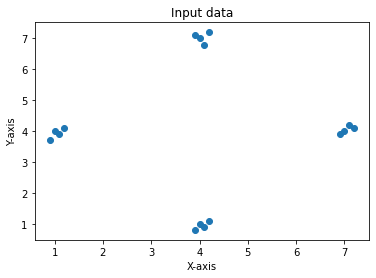

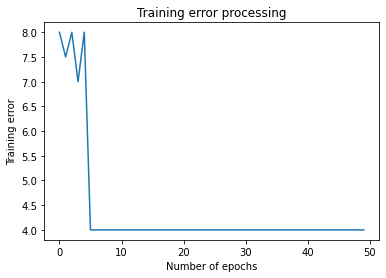

[[0. 0.]]
[[1. 0.]]
[[1. 1.]]


In [3]:
# 创建一个单层神经网络：一个输入层、一个隐藏层、一个输出层
input_file = 'data_single_layer.txt'
input_text = np.loadtxt(input_file)
data = input_text[:, 0:2]
labels = input_text[:, 2:]

plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')
#plt.show()

# extract max / min from each dimensions
x_min, x_max = data[:,0].min(), data[:,0].max()
y_min, y_max = data[:,1].min(), data[:,1].max()

# define single neural network : 隐藏层包含两个神经元
single_layer_net = nl.net.newp([[x_min, x_max], [y_min, y_max]], 2)
# training
error = single_layer_net.train(data, labels, epochs=50, show=20, lr=0.01)

plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.title('Training error processing')

plt.show()

# test data
print(single_layer_net.sim([[0.3, 4.5]]))
print(single_layer_net.sim([[4.5, 0.5]]))
print(single_layer_net.sim([[4.3, 8]]))

Epoch: 100; Error: 0.04043826746757124;
Epoch: 200; Error: 0.028361593316793568;
Epoch: 300; Error: 0.02269444163605587;
Epoch: 400; Error: 0.018921316918741854;
Epoch: 500; Error: 0.05518163652733242;
Epoch: 600; Error: 0.011601628069517792;
Epoch: 700; Error: 0.016050211927595086;
Epoch: 800; Error: 0.020974122112434566;
The maximum number of train epochs is reached


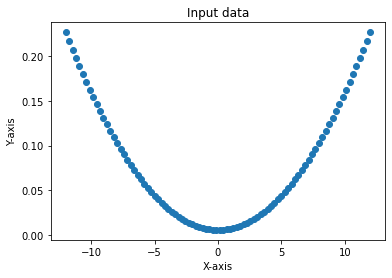

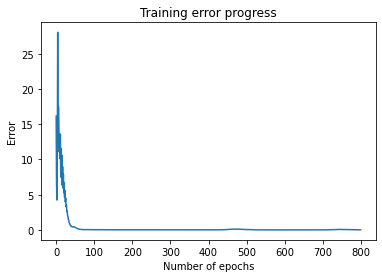

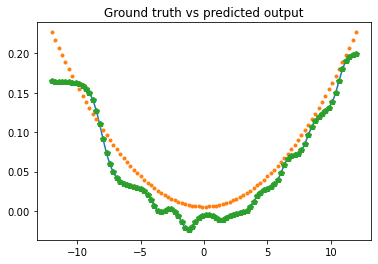

In [12]:
# 创建一个深度神经网络：包含多个隐藏层
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt

# initialize variables
min_value, max_value = -12, 12
num_datapoints = 90

# generate training datasets
x = np.linspace(min_value, max_value, num_datapoints)
y = 2 * np.square(x) + 7
y /= np.linalg.norm(y)

# 数组变形
data = x.reshape(num_datapoints, 1)
labels = y.reshape(num_datapoints, 1)

# plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')

# 定义一个深度神经网络，两个隐藏层：每个由10个神经元组成，输出层由一个神经元组成
multilayer_net = nl.net.newff([[min_value, max_value]], [10, 10, 1])

# train as gradient-descent(梯度下降算法)
multilayer_net.trainf = nl.train.train_gd
error = multilayer_net.train(data, labels, epochs=800, show=100, lr=0.01)

# predict
predicted_output = multilayer_net.sim(data)

# plot train eroor
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

# perform test
x2 = np.linspace(min_value, max_value, num_datapoints * 2)
y2 = multilayer_net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
y3 = predicted_output.reshape(num_datapoints)

plt.figure()
plt.plot(x2, y2, '-', x, y, '.', x, y3, 'p')
plt.title('Ground truth vs predicted output')

plt.show()